In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
Pfizer_file = pd.read_csv('Pfizer.csv')
Pfizer_data = [float(x) for x in Pfizer_file['Open']]
Pfizer_time = pd.to_datetime(Pfizer_file['Date'])

Moderna_file = pd.read_csv('Moderna.csv')
Moderna_data = [float(x) for x in Moderna_file['Open']]
Moderna_time = pd.to_datetime(Moderna_file['Date'])

## Wykresy 

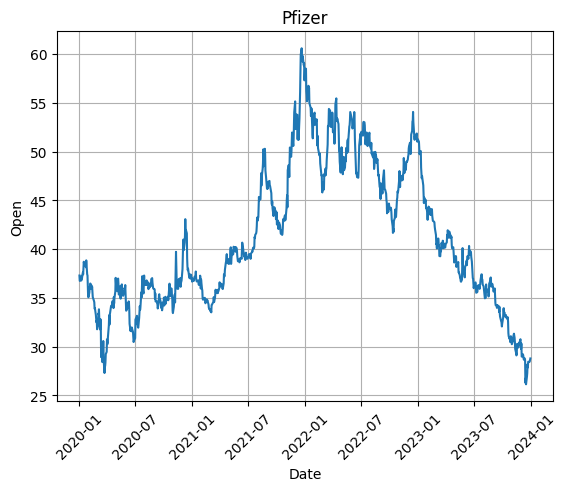

In [10]:
plt.plot(Pfizer_time, Pfizer_data)
plt.xlabel('Date')
plt.ylabel('Open')
plt.xticks(rotation=45)
plt.title('Pfizer')
plt.grid(True)
plt.show()

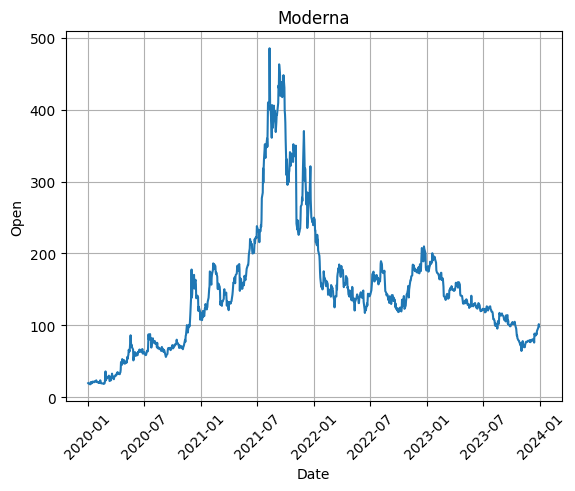

In [11]:
plt.plot(Moderna_time, Moderna_data)
plt.xlabel('Date')
plt.ylabel('Open')
plt.title('Moderna')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Średnia

In [12]:
def arytmetyczna(data):
    return sum(data)/len(data)

def harmoniczna(data):

    suma = 0
    for i in range(len(data)):
        suma += 1/data[i]

    return len(data)/suma

def geometryczna(data):
    product = 1
    for i in range(len(data)):
        product *= data[i]

    return product**(1/len(data))

In [15]:
print("Srednia arytmetyczna Pfizer", arytmetyczna(Pfizer_data))
print("Srednia arytmetyczna Moderna", arytmetyczna(Moderna_data))

Srednia arytmetyczna JNJ 160.98576545129225
Srednia arytmetyczna Pfizer 40.96097044632205
Srednia arytmetyczna Moderna 147.19275533300208


In [16]:
print("Srednia harmoniczna Pfizer", harmoniczna(Pfizer_data))
print("Srednia harmoniczna Moderna", harmoniczna(Moderna_data))

Srednia harmoniczna JNJ 160.1132323887989
Srednia harmoniczna Pfizer 39.69745171877357
Srednia harmoniczna Moderna 94.8250220800443
